In [1]:
import pandas as pd
import plotly.express as px
import altair as alt
from vega_datasets import data
from math import pi
import matplotlib.pyplot as plt

# Part 1.1

In [2]:
# import csv as dataframe
df = pd.read_csv('breast_cancer.csv')
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [3]:
df_two_classes = df.groupby('Class').mean()
df_two_classes = df_two_classes.reset_index()
df_two_classes

,Class,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,2,2.963964,1.306306,1.414414,1.346847,2.108108,1.346847,2.083333,1.261261,1.065315
1,4,7.188285,6.577406,6.560669,5.585774,5.326360,7.627615,5.974895,5.857741,2.602510


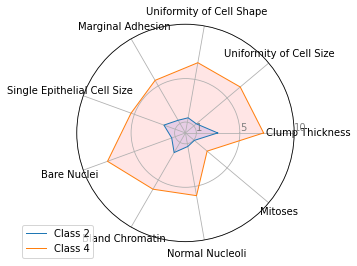

<Figure size 1440x1440 with 0 Axes>

In [4]:
## creating background
 
# number of variables
categories = list(df_two_classes)[1:]
N = len(categories)
 
# angle of each axis in the plot
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,5,10], ["1","5","10"], color="grey", size=10)
plt.ylim(0,10)
 

## adding plots
 
# class 2 data
values=df_two_classes.iloc[0].drop('Class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Class 2")
ax.fill(angles, values, 'b', alpha=0.1)
 
# class 4 data
values=df_two_classes.iloc[1].drop('Class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Class 4")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
fig = plt.figure(figsize=(20, 20))
plt.show()

I chose this radial plot because it looked really interesting on the site. When I clicked on the page, the first thing I saw was that this type of chart was actually criticized often because of issues like skewed scales and overplotting. Fortunately, the [data](https://www.kaggle.com/datasets/marshuu/breast-cancer/code) I found on breast cancer attributes have variables that all range from 1 to 10. This at least solves the issue of skewed scales. I did end up taking the average of the two classes and plotting the attributes accordingly to avoid adding too much information on the plot. This plot uses the mark of area and the channels of color, position, and size to encode the data. 

It appears that class 4 tend to have higher values for all attributes. While the original dataset did not distinguish the two classes as benign or malignant, I did a deeper dive and found the research paper that this dataset came from. From this [paper](https://www.sciencedirect.com/science/article/pii/S2352914820306092), having higher values in these attributes suggests benign tumors.

# Part 2.2

In [5]:
# importing data from url due to large data file
source = data.seattle_temps.url

# initializing a chart using altair
alt.Chart(
    # what data is used
    source,
    # naming the visualization
    title="2010 Daily High Temperature (F) in Seattle, WA"
# using the mark of rectangles for this visualization 
).mark_rect().encode(
    # x axis data - treating the date as ordinal data
    x='date(date):O',
    # y axis data - treating the month as ordinal data
    y='month(date):O',
    # use inferno color scheme to encode the maximum temperature 
    color=alt.Color('max(temp):Q', scale=alt.Scale(scheme="inferno")),
    # tooltip shows additional data when hovering over a rectangle
    tooltip=[
        # adding month and date to the label
        alt.Tooltip('monthdate(date):T', title='Date'),
        # adding maximum temperature to the label
        alt.Tooltip('max(temp):Q', title='Max Temp')
    ]
# setting chart width
).properties(width=550)

alt.Chart(...)

# Part 3

### Table 3

In [6]:
# loading table 3 as dataframe
table3 = pd.read_excel('table3.xlsx')
table3.head()

,Land cover types,Location,Area
0,NWI marine wetlands,Mystic,1298.80
1,Salt marsh,Mystic,46.80
2,Freshwater Wetland,Mystic,94.30
3,City parks,Mystic,1214.70
4,Beach,Mystic,35.25


In [7]:
# creating grouped bar chart
alt.Chart(table3).mark_bar().encode(
    # x axis is type of land cover
    x='Land cover types',
    # y axis is area in acres
    y=alt.Y('Area', axis = alt.Axis(title = 'Area (acre)')), 
    # color to distinguish between land cover types
    color='Land cover types',
    # group by location
    column='Location'
).properties(
    # adding title
    title='2013 Land cover areas at different locations',
    # changing chart dimensions
    width=300,
    height=300
)

alt.Chart(...)

The land cover types shown represent the different types of ecosystems that can be found in the region of interest. The researchers calculated the area of each ecosystem present in the four locations in the study. The grouped bar chart allows the user to compare the areas that each type of ecosystem cover at each location. For example, at the Charles and neponset, forests were the largest ecosystem by far, but at all other locations, coastal waters covered the most area. 

### Table 5

In [8]:
# loading table 5 as dataframe
table5 = pd.read_excel('table5.xlsx')
table5.head()

,Land cover types,Level,Value
0,NWI marine wetlands,Low,90367611
1,Salt marsh,Low,5836741
2,Freshwater wetland,Low,7416748
3,City parks,Low,249158682
4,Beach,Low,1748766


In [9]:
# creating grouped bar chart
alt.Chart(table5).mark_bar().encode(
    # x axis is type of land cover
    x='Land cover types',
    # y axis is value of services in dollars
    y=alt.Y('Value', axis = alt.Axis(title = 'Value (dollar)')), 
    # color to distinguish between land cover types
    color='Land cover types',
    # group by level
    column='Level'
).properties(
    # adding title
    title='Range of ecosystem services values for each land cover type in 2016',
)

alt.Chart(...)

This visualization shows the service values of different land cover types at both the high and low range. The land cover types shown represent the different types of ecosystems that can be found in the study area. The researchers calculated the value ecosystem services of each land cover type. The grouped bar chart allows the user to compare the upper and lower range of values of each type of ecosystem cover. For example, in the higher estimate of asset value, forests had the highest value while in the lower estimate of asset value, city parks had the highest value. 

### Table 6

In [10]:
# loading table 6 as dataframe
table6 = pd.read_excel('table6.xlsx')
table6.head()

,Cleanup status,Level,Value
0,With cleanup,Low,705209378
1,Without cleanup,Low,489883908
2,Benefit of cleanup,Low,215325469
3,With cleanup,Mid,1416705140
4,Without cleanup,Mid,879715684


In [11]:
# creating grouped bar chart
alt.Chart(table6).mark_bar().encode(
    # x axis is the cleanup status
    x='Cleanup status',
    # y axis is value of services in dollars
    y=alt.Y('Value', axis = alt.Axis(title = 'Value (dollar)')), 
    # color to distinguish between cleanup status
    color='Cleanup status',
    # group by level
    column='Level'
).properties(
    # adding title
    title='Range of ecosystem services values with and without cleanup in 2016',
)

alt.Chart(...)

This visualization shows the value of ecosystem services with and without cleanup at high, low, and mid levels of value estimates. The benefit of cleanup is just the difference in values between the ecosystem with cleanup and without cleanup. The values of services for all three cleanup status groups increase from low to high levels, with the benefit of cleanup for the high range even greater than the cleanup value of the low range. This chart shows that the cleanup can be financially beneficial by increasing the asset value of the ecosystem.  